In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

# TRABAJO FINAL
###### YOJAYRA MIREYA FARINANGO CACHIGUANGO

In [8]:
os.getcwd()
# Verificar el directorio actual
current_directory = os.getcwd()
print("Directorio actual:", current_directory)

Directorio actual: C:\Users\User\Downloads


In [47]:
# Carga de datos desde un archivo de texto
datos = pd.read_csv("sample_endi_model_10p.txt", sep=";")
print(datos)
# Descripción estadística de los datos
datos.describe()

        sexo              etnia  dcronica  region  n_hijos      tipo_de_piso  \
0     Hombre     Mestizo/Blanco       0.0     NaN      NaN               NaN   
1     Hombre     Mestizo/Blanco       0.0     1.0      3.0          Adecuado   
2      Mujer  Afroecuatoriana/o       0.0     1.0      1.0  Cemento/Ladrillo   
3     Hombre           Indígena       1.0     3.0      1.0        Tabla/Caña   
4     Hombre     Mestizo/Blanco       0.0     2.0      4.0  Cemento/Ladrillo   
...      ...                ...       ...     ...      ...               ...   
2232  Hombre     Mestizo/Blanco       0.0     1.0      2.0          Adecuado   
2233   Mujer     Mestizo/Blanco       1.0     1.0      1.0          Adecuado   
2234  Hombre     Mestizo/Blanco       0.0     2.0      2.0  Cemento/Ladrillo   
2235  Hombre     Mestizo/Blanco       1.0     3.0      7.0        Tabla/Caña   
2236  Hombre  Afroecuatoriana/o       0.0     2.0      3.0          Adecuado   

      espacio_lavado categoria_segurida

,dcronica,region,n_hijos,espacio_lavado,fexp_nino
count,2197.000000,2191.000000,2191.000000,2064.000000,2237.000000
mean,0.194356,1.710634,2.325879,0.987888,0.996119
std,0.395794,0.780043,1.347299,0.109414,1.306759
min,0.000000,1.000000,1.000000,0.000000,0.047608
25%,0.000000,1.000000,1.000000,1.000000,0.341642
50%,0.000000,2.000000,2.000000,1.000000,0.603691
75%,0.000000,2.000000,3.000000,1.000000,1.104380
max,1.000000,3.000000,11.000000,1.000000,13.947610


## EJERCICIO N°1

In [48]:
#Variable clave a analizar: categoria_agua, población objetivo: mujeres
#Limpieza de datos
datos = datos[~datos["categoria_agua"].isna()]

#Usamos la variable a analizar que es categoría_ agua
variables = ['categoria_agua']

#Filtramos la población objetivo mujeres
filtro= datos['sexo'] == "Mujer"

filtrados= datos[filtro]
filtrados.groupby("categoria_agua").size()

categoria_agua
Agua Básica         9
Agua Limitada      59
Agua Segura      1001
Otra                1
dtype: int64

##### Las niñas que cuentan con agua básica son 9
#####  Las niñas que cuentan con agua limitada son 59
#####  Las niñas que cuentan con agua segura son 1001
##### Una niña se encuentra en otra categoría no definida

In [49]:
#limpieza de datos en la variable categoria agua
for i in variables:
    filtrados = filtrados[~filtrados[i].isna()]


In [45]:
#Cambiamos los nombres de las categorías de agua
#datos["categoria_agua"] = datos["categoria_agua"].apply(lambda x: "limitada" if x == "Agua Limitada"  else "segura" if x == "Agua Segura" else "básica" )

## EJERCICIO N°2

In [51]:
#Definimos variables categóricas
variables_categoricas = [ 'sexo', 'categoria_agua']

#Generamos una copia de la base original
transformador = StandardScaler()
datos_escalados = datos.copy()

# Variables ficticias de las categóricas
datos_dummies = pd.get_dummies(datos_escalados, columns=variables_categoricas, drop_first=True)
print(datos_dummies)

#Limpiamos la variable dcronica para realizar el análiss de estimación
datos = datos[~datos["dcronica"].isna()]


                  etnia  dcronica  region  n_hijos      tipo_de_piso  \
1        Mestizo/Blanco       0.0     1.0      3.0          Adecuado   
2     Afroecuatoriana/o       0.0     1.0      1.0  Cemento/Ladrillo   
3              Indígena       1.0     3.0      1.0        Tabla/Caña   
4        Mestizo/Blanco       0.0     2.0      4.0  Cemento/Ladrillo   
5              Indígena       0.0     1.0      2.0  Cemento/Ladrillo   
...                 ...       ...     ...      ...               ...   
2232     Mestizo/Blanco       0.0     1.0      2.0          Adecuado   
2233     Mestizo/Blanco       1.0     1.0      1.0          Adecuado   
2234     Mestizo/Blanco       0.0     2.0      2.0  Cemento/Ladrillo   
2235     Mestizo/Blanco       1.0     3.0      7.0        Tabla/Caña   
2236  Afroecuatoriana/o       0.0     2.0      3.0          Adecuado   

      espacio_lavado categoria_seguridad_alimentaria condicion_empleo  \
1                1.0                       Seguridad      Dese

In [52]:
# Definimos las variables dependientes e independientes
X = datos_dummies[['sexo_Mujer', 'categoria_agua_Agua Limitada', 'categoria_agua_Agua Segura']]
y = datos_dummies["dcronica"]

In [53]:
weights = datos_dummies['fexp_nino']

In [55]:
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, test_size=0.2, random_state=42)

# Convertimos todas las variables a tipo numérico
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')

# Convertimos las variables a tipo entero
variables = X_train.columns
for i in variables:
    X_train[i] = X_train[i].astype(int)
    X_test[i] = X_test[i].astype(int)

y_train = y_train.astype(int)

In [56]:
#Estimación del modelo
modelo = sm.Logit(y_train, X_train)
result = modelo.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.494519
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               dcronica   No. Observations:                 1720
Model:                          Logit   Df Residuals:                     1717
Method:                           MLE   Df Model:                            2
Date:                Tue, 27 Feb 2024   Pseudo R-squ.:                0.005315
Time:                        19:25:13   Log-Likelihood:                -850.57
converged:                       True   LL-Null:                       -855.12
Covariance Type:            nonrobust   LLR p-value:                   0.01062
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
sexo_Mujer                      -0.0562      0.121     -0.465      0.642

#### Las mujeres tiene una probabilidad menor a tener disminución crónica que los hombres, aunque el estimador no es estadísticamente significativo
#### La probabilidad de tener desnutrición crónica cuando tengo acceso a agua limitada es menor con respecto a tener agua básica. El estimdor es estadísticamente sígnificativo, aunque se creería que contar con agua limitada debería aumentar la propención a tener desnutrición crónica.
#### La probabilidad de tener desnutrición crónica cuando tengo acceso a agua segura es menor con respecto a tener agua básica. El estimdor es estadísticamente sígnificativo.

In [57]:
# Extraemos los coeficientes y los almacenamos en un DataFrame
coeficientes = result.params
df_coeficientes = pd.DataFrame(coeficientes).reset_index()
df_coeficientes.columns = ['Variable', 'Coeficiente']

# Creamos una tabla pivote para una mejor visualización
df_pivot = df_coeficientes.pivot_table(columns='Variable', values='Coeficiente')
df_pivot.reset_index(drop=True, inplace=True)

In [58]:
# Realizamos predicciones en el conjunto de prueba
predictions = result.predict(X_test)
# Convertimos las probabilidades en clases binarias
predictions_class = (predictions > 0.5).astype(int)
# Comparamos las predicciones con los valores reales
predictions_class == y_test

1211    False
1896     True
1013     True
788      True
908      True
        ...  
1916     True
463      True
570     False
27       True
2075     True
Length: 431, dtype: bool

In [59]:
# 100 folds:
kf = KFold(n_splits=100)
accuracy_scores = []
df_params = pd.DataFrame()

for train_index, test_index in kf.split(X_train):

    # aleatorizamos los folds en las partes necesarias:
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    weights_train_fold, weights_test_fold = weights_train.iloc[train_index], weights_train.iloc[test_index]
    
    # Ajustamos un modelo de regresión logística en el pliegue de entrenamiento
    log_reg = sm.Logit(y_train_fold, X_train_fold)
    result_reg = log_reg.fit()
    
    # Extraemos los coeficientes y los organizamos en un DataFrame
    coeficientes = result_reg.params
    df_coeficientes = pd.DataFrame(coeficientes).reset_index()
    df_coeficientes.columns = ['Variable', 'Coeficiente']
    df_pivot = df_coeficientes.pivot_table(columns='Variable', values='Coeficiente')
    df_pivot.reset_index(drop=True, inplace=True)
    
    # Realizamos predicciones en el pliegue de prueba
    predictions = result_reg.predict(X_test_fold)
    predictions = (predictions >= 0.5).astype(int)
    
    # Calculamos la precisión del modelo en el pliegue de prueba
    accuracy = accuracy_score(y_test_fold, predictions)
    accuracy_scores.append(accuracy)
    
    # Concatenamos los coeficientes estimados en cada pliegue en un DataFrame
    df_params = pd.concat([df_params, df_pivot], ignore_index=True)

print(f"Precisión promedio de validación cruzada: {np.mean(accuracy_scores)}")

Optimization terminated successfully.
         Current function value: 0.495525
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.495213
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.494845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.493142
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.494864
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.494053
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.494837
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.494771
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.491683
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.496660
  

In [60]:
# Calcular la precisión promedio
precision_promedio = np.mean(accuracy_scores)

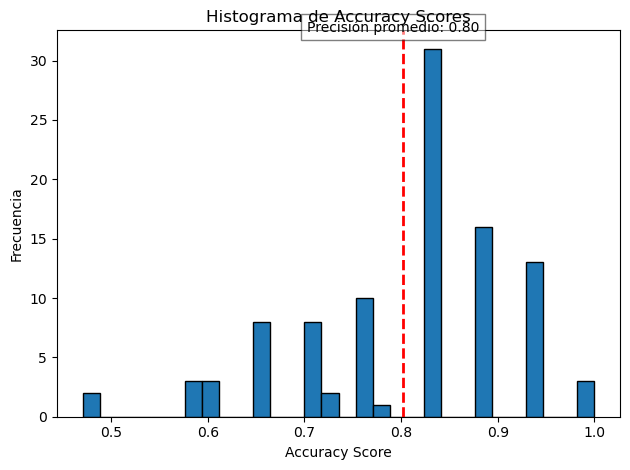

In [61]:
plt.hist(accuracy_scores, bins=30, edgecolor='black')
# Añadir una línea vertical en la precisión promedio
plt.axvline(precision_promedio, color='red', linestyle='dashed', linewidth=2)

# Añadir un texto que muestre la precisión promedio
plt.text(precision_promedio-0.1, plt.ylim()[1]-0.1, f'Precisión promedio: {precision_promedio:.2f}', 
         bbox=dict(facecolor='white', alpha=0.5))

plt.title('Histograma de Accuracy Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Frecuencia')

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el histograma
plt.show()

#### La precisión de las estimaciones del modelo es 80% acertada.

## EJERCICIO N°3

In [84]:
#Definimos variables categóricas
variables_categoricas = ['categoria_agua']

#Generamos una copia de la base original
transformador = StandardScaler()
datos_escalados2 = filtrados.copy()

#Limpiamos la variable dcronica para realizar el análiss de estimación
datos_escalados2 = datos_escalados2[~datos_escalados2["dcronica"].isna()]
datos_escalados2 = datos_escalados2[~datos_escalados2["categoria_agua"].isna()]
datos_escalados2 = datos_escalados2[~datos_escalados2["espacio_lavado"].isna()]

# Variables ficticias de las categóricas
datos_dummies = pd.get_dummies(datos_escalados2, columns=variables_categoricas, drop_first=True)
print(datos_dummies)


       sexo              etnia  dcronica  region  n_hijos      tipo_de_piso  \
2     Mujer  Afroecuatoriana/o       0.0     1.0      1.0  Cemento/Ladrillo   
8     Mujer     Mestizo/Blanco       0.0     1.0      2.0  Cemento/Ladrillo   
9     Mujer     Mestizo/Blanco       0.0     1.0      1.0  Cemento/Ladrillo   
10    Mujer     Mestizo/Blanco       0.0     1.0      1.0        Tabla/Caña   
11    Mujer     Mestizo/Blanco       1.0     1.0      1.0  Cemento/Ladrillo   
...     ...                ...       ...     ...      ...               ...   
2221  Mujer     Mestizo/Blanco       0.0     2.0      4.0  Cemento/Ladrillo   
2222  Mujer     Mestizo/Blanco       0.0     2.0      2.0        Tabla/Caña   
2225  Mujer     Mestizo/Blanco       0.0     1.0      6.0          Adecuado   
2231  Mujer     Mestizo/Blanco       0.0     3.0      2.0  Cemento/Ladrillo   
2233  Mujer     Mestizo/Blanco       1.0     1.0      1.0          Adecuado   

      espacio_lavado categoria_seguridad_alimentari

In [85]:
# Definimos las variables dependientes e independientes
X = datos_dummies[['categoria_agua_Agua Limitada', 'categoria_agua_Agua Segura']]
y = datos_dummies["dcronica"]

In [86]:
weights = datos_dummies['fexp_nino']

In [88]:
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, test_size=0.2, random_state=42)

# Convertimos todas las variables a tipo numérico
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')

# Convertimos las variables a tipo entero
variables = X_train.columns
for i in variables:
    X_train[i] = X_train[i].astype(int)
    X_test[i] = X_test[i].astype(int)

y_train = y_train.astype(int)

In [89]:
#Estimación del modelo
modelo = sm.Logit(y_train, X_train)
result = modelo.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.469891
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               dcronica   No. Observations:                  789
Model:                          Logit   Df Residuals:                      787
Method:                           MLE   Df Model:                            1
Date:                Tue, 27 Feb 2024   Pseudo R-squ.:              -0.0009875
Time:                        20:25:52   Log-Likelihood:                -370.74
converged:                       True   LL-Null:                       -370.38
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
categoria_agua_Agua Limitada    -1.6740      0.445     -3.763      0.000

In [90]:
# Extraemos los coeficientes y los almacenamos en un DataFrame
coeficientes = result.params
df_coeficientes = pd.DataFrame(coeficientes).reset_index()
df_coeficientes.columns = ['Variable', 'Coeficiente']

# Creamos una tabla pivote para una mejor visualización
df_pivot = df_coeficientes.pivot_table(columns='Variable', values='Coeficiente')
df_pivot.reset_index(drop=True, inplace=True)

In [91]:
# Realizamos predicciones en el conjunto de prueba
predictions = result.predict(X_test)
# Convertimos las probabilidades en clases binarias
predictions_class = (predictions > 0.5).astype(int)
# Comparamos las predicciones con los valores reales
predictions_class == y_test

719     False
337      True
1170    False
1954    False
194     False
        ...  
1514     True
1442     True
1060     True
1256    False
684      True
Length: 198, dtype: bool

In [92]:
# 100 folds:
kf = KFold(n_splits=100)
accuracy_scores = []
df_params = pd.DataFrame()

for train_index, test_index in kf.split(X_train):

    # aleatorizamos los folds en las partes necesarias:
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    weights_train_fold, weights_test_fold = weights_train.iloc[train_index], weights_train.iloc[test_index]
    
    # Ajustamos un modelo de regresión logística en el pliegue de entrenamiento
    log_reg = sm.Logit(y_train_fold, X_train_fold)
    result_reg = log_reg.fit()
    
    # Extraemos los coeficientes y los organizamos en un DataFrame
    coeficientes = result_reg.params
    df_coeficientes = pd.DataFrame(coeficientes).reset_index()
    df_coeficientes.columns = ['Variable', 'Coeficiente']
    df_pivot = df_coeficientes.pivot_table(columns='Variable', values='Coeficiente')
    df_pivot.reset_index(drop=True, inplace=True)
    
    # Realizamos predicciones en el pliegue de prueba
    predictions = result_reg.predict(X_test_fold)
    predictions = (predictions >= 0.5).astype(int)
    
    # Calculamos la precisión del modelo en el pliegue de prueba
    accuracy = accuracy_score(y_test_fold, predictions)
    accuracy_scores.append(accuracy)
    
    # Concatenamos los coeficientes estimados en cada pliegue en un DataFrame
    df_params = pd.concat([df_params, df_pivot], ignore_index=True)

print(f"Precisión promedio de validación cruzada: {np.mean(accuracy_scores)}")

Optimization terminated successfully.
         Current function value: 0.470734
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.466815
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.472675
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.464604
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.470099
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.468780
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.472675
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.464838
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.470763
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.470734
  

In [93]:
# Calcular la precisión promedio
precision_promedio = np.mean(accuracy_scores)

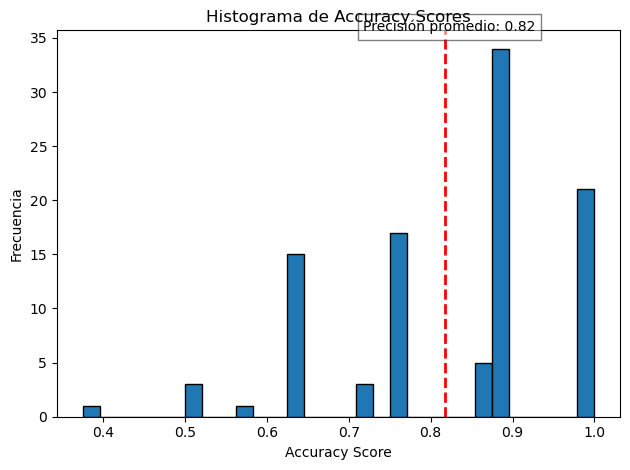

In [94]:
plt.hist(accuracy_scores, bins=30, edgecolor='black')
# Añadir una línea vertical en la precisión promedio
plt.axvline(precision_promedio, color='red', linestyle='dashed', linewidth=2)

# Añadir un texto que muestre la precisión promedio
plt.text(precision_promedio-0.1, plt.ylim()[1]-0.1, f'Precisión promedio: {precision_promedio:.2f}', 
         bbox=dict(facecolor='white', alpha=0.5))

plt.title('Histograma de Accuracy Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Frecuencia')

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el histograma
plt.show()

#### La precisión de las estimaciones del modelo es 82% acertada, es decir, 2 puntos porcentuales más preciso que la base de datos sin filtros.